In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from itertools import combinations

In [2]:
iris = datasets.load_iris()
x,y = iris.data, iris.target

print(x.shape, y.shape)

(150, 4) (150,)


(-0.4, 4.9)

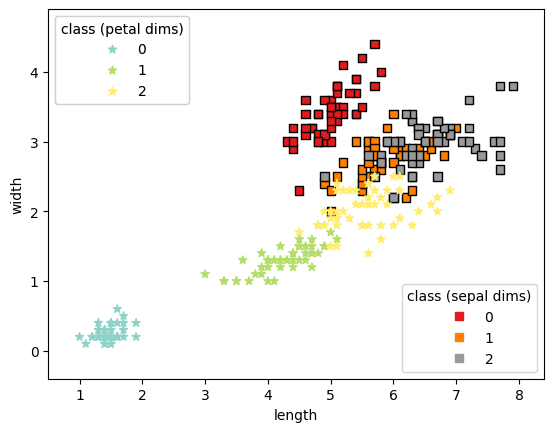

In [3]:
x_min, x_max = min([x[:, 0].min(), x[:, 2].min()]) - 0.5, max([x[:, 0].max(), x[:, 2].max()]) + 0.5
y_min, y_max = min([x[:, 1].min(), x[:, 3].min()]) - 0.5, max([x[:, 1].max(), x[:, 3].max()]) + 0.5

fig, ax = plt.subplots()
scatter = ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1, marker="s", edgecolors='k')
scatter2 = ax.scatter(x[:, 2], x[:, 3], c=y, cmap=plt.cm.Set3, marker="*")
plt.xlabel("length")
plt.ylabel("width")

legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="class (sepal dims)")
legend2 = ax.legend(*scatter2.legend_elements(), loc="upper left", title="class (petal dims)")
ax.add_artist(legend)
ax.add_artist(legend2)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

In [4]:
labels = {
    0: "sepal length",
    1: "sepal widtth",
    2: "petal length",
    3: "petal width",
}

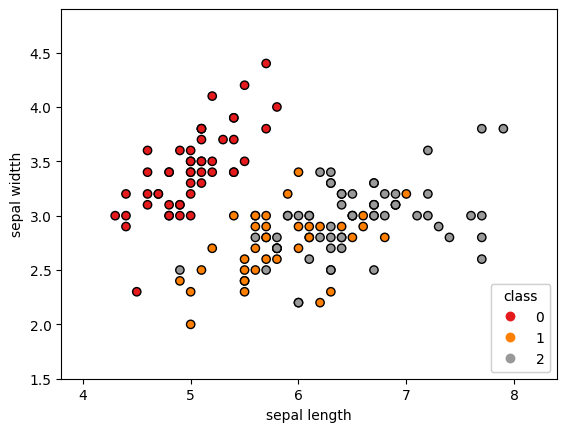

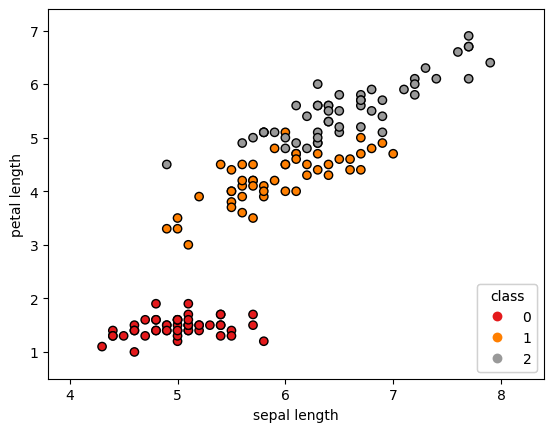

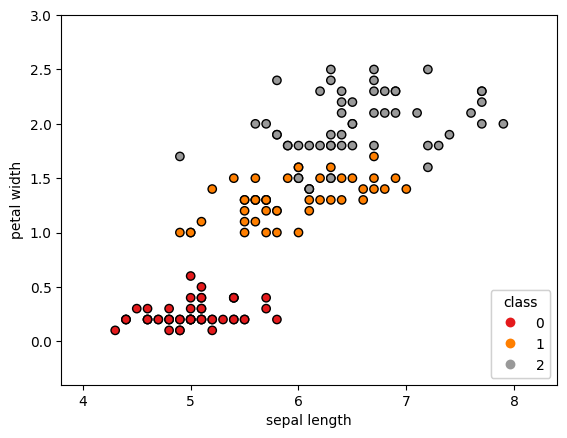

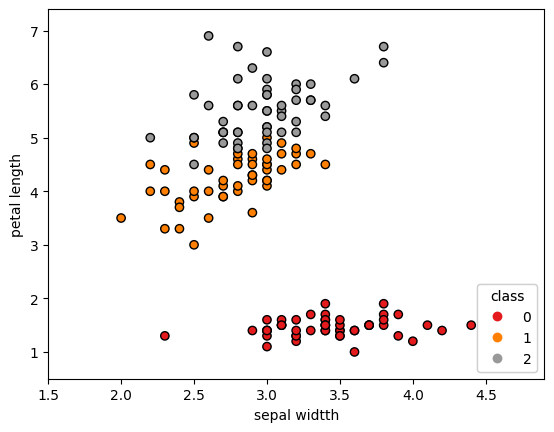

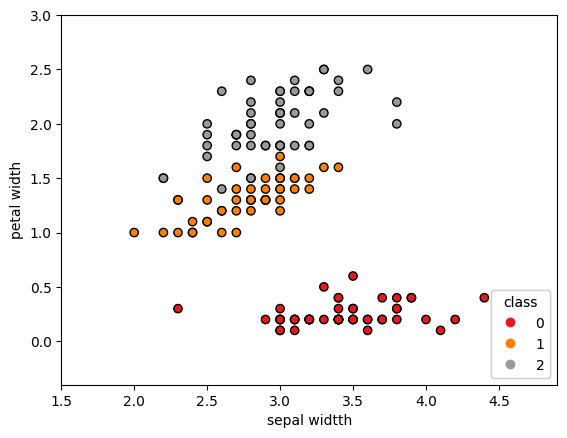

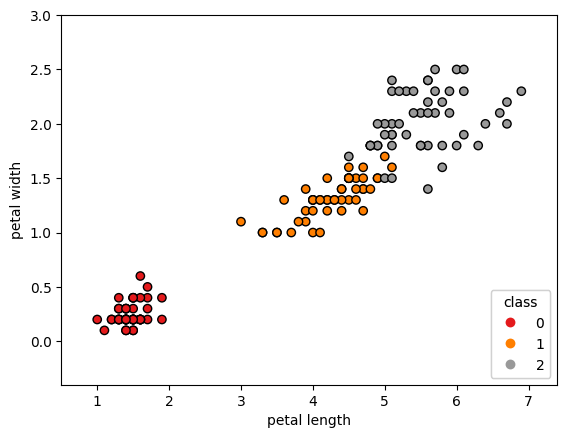

In [5]:
for i,j in combinations(range(4), r=2):
    x_data, y_data = x[:, i], x[:, j]
    x_min, x_max = x_data.min() - 0.5, x_data.max() + 0.5
    y_min, y_max = y_data.min() - 0.5, y_data.max() + 0.5

    fig, ax = plt.subplots()
    scatter = ax.scatter(x_data, y_data, c=y, cmap=plt.cm.Set1, edgecolor="k")
    
    plt.xlabel(labels[i])
    plt.ylabel(labels[j])

    legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="class")
    ax.add_artist(legend)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

In [6]:
random0 = np.random.choice(np.arange(0,50), 50, replace=False)
random1 = np.random.choice(np.arange(50,100), 50, replace=False)
random2 = np.random.choice(np.arange(100,150), 50, replace=False)

x0, y0 = x[random0[:40], :], y[random0[:40]]
x1, y1 = x[random1[:40], :], y[random1[:40]]
x2, y2 = x[random2[:40], :], y[random2[:40]]

x0_test, y0_test = x[random0[40:], :], y[random0[40:]]
x1_test, y1_test = x[random1[40:], :], y[random1[40:]]
x2_test, y2_test = x[random2[40:], :], y[random2[40:]]

x01_train = np.concatenate([x0[:,0:2], x1[:, 0:2]])
y01_train = np.concatenate([y0, y1])
x01_test = np.concatenate([x0_test[:, 0:2], x1_test[:, 0:2]])
y01_test = np.concatenate([y0_test, y1_test])

Text(0, 0.5, 'sepal length')

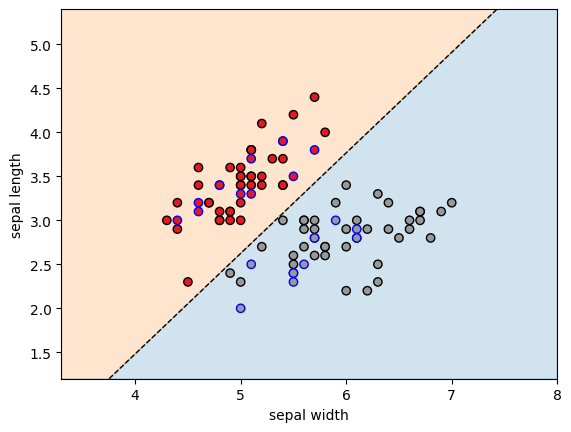

In [7]:
clf = LogisticRegression(random_state=0).fit(x01_train, y01_train)

b = clf.intercept_[0]
w1, w2 = clf.coef_.T

c = -b/w2

m = -w1/w2
xmin, xmax = np.min(x01_train, 0)[0] - 1, np.max(x01_train, 0)[0] + 1
ymin, ymax = np.min(x01_train, 0)[1] - 1, np.max(x01_train, 0)[1] + 1

xd = np.array([xmin, xmax])
yd = m * xd + c
plt.plot(xd, yd, "k", lw=1, ls="--")
plt.fill_between(xd, yd, ymin, color="tab:blue", alpha=0.2)
plt.fill_between(xd, yd, ymax, color="tab:orange", alpha=0.2)

plt.scatter(*x01_train.T, c=y01_train, cmap=plt.cm.Set1, edgecolors="k")
plt.scatter(*x01_test.T, c=y01_test, cmap=plt.cm.Set1, edgecolors="b")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel(r'sepal width')
plt.ylabel(r'sepal length')

train accuracy:  0.775 	test accuracy:  0.6


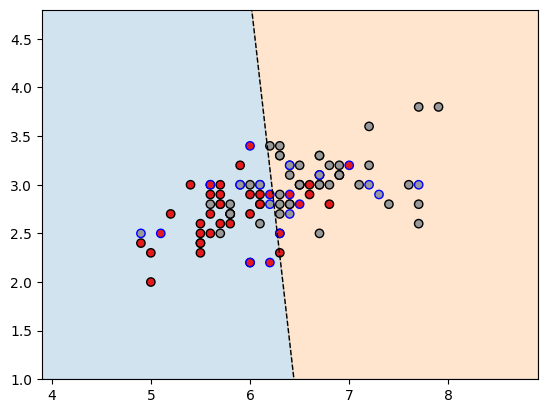

In [26]:
random0 = np.random.choice(np.arange(0,50), 50, replace=False)
random1 = np.random.choice(np.arange(50,100), 50, replace=False)
random2 = np.random.choice(np.arange(100,150), 50, replace=False)

x0, y0 = x[random0[:40], :], y[random0[:40]]
x1, y1 = x[random1[:40], :], y[random1[:40]]
x2, y2 = x[random2[:40], :], y[random2[:40]]

x0_test, y0_test = x[random0[40:], :], y[random0[40:]]
x1_test, y1_test = x[random1[40:], :], y[random1[40:]]
x2_test, y2_test = x[random2[40:], :], y[random2[40:]]

x12_train = np.concatenate([x1[:,0:2], x2[:, 0:2]])
y12_train = np.concatenate([y1, y2])
x12_test = np.concatenate([x1_test[:, 0:2], x2_test[:, 0:2]])
y12_test = np.concatenate([y1_test, y2_test])

clf = LogisticRegression(random_state=0)
clf.fit(x12_train, y12_train)

b = clf.intercept_[0]
w1, w2 = clf.coef_.T

c = -b/w2
m = -w1/w2

xmin, xmax = np.min(x12_train, 0)[0] - 1, np.max(x12_train, 0)[0] + 1
ymin, ymax = np.min(x12_train, 0)[1] - 1, np.max(x12_train, 0)[1] + 1

xd = np.array([xmin, xmax])
yd = m * xd + c
plt.plot(xd, yd, "k", lw=1, ls="--")
plt.fill_between(xd, yd, ymin, color="tab:blue", alpha=0.2)
plt.fill_between(xd, yd, ymax, color="tab:orange", alpha=0.2)

plt.scatter(*x12_train.T, c=y12_train, cmap=plt.cm.Set1, edgecolors="k")
plt.scatter(*x12_test.T, c=y12_test, cmap=plt.cm.Set1, edgecolors="b")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

train_accuracy, test_accuracy = clf.score(x12_train, y12_train), clf.score(x12_test, y12_test)
print("train accuracy: ", train_accuracy, "\ttest accuracy: ", test_accuracy)